<a href="https://colab.research.google.com/github/ruforavishnu/Project_Machine_Learning/blob/master/Project17_Unsupervised_Learning_Dimensionality_Reduction_for_Image_Compression_using_t_SNE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.neighbors import NearestNeighbors
from tensorflow.keras.datasets import mnist
import imageio

In [22]:
(x_train, _)  ,  (_, _) = mnist.load_data()



In [23]:
x = x_train[:5000]

x_norm = x / 255.0

x_flat = x_norm.reshape( len(x_norm) ,  -1)

print('Original image shape (28x28 images) :', x.shape)
print('Flattened shape (1D vectors) :',x_flat.shape )



Original image shape (28x28 images) : (5000, 28, 28)
Flattened shape (1D vectors) : (5000, 784)


In [24]:
from sklearn.decomposition import PCA


pca = PCA(n_components=50)


x_pca = pca.fit_transform(x_flat)

print('Compressed shape: ', x_pca.shape)




Compressed shape:  (5000, 50)


In [25]:
x_reconstructed_flat = pca.inverse_transform(x_pca)


x_reconstructed = x_reconstructed_flat.reshape(-1,  28, 28)


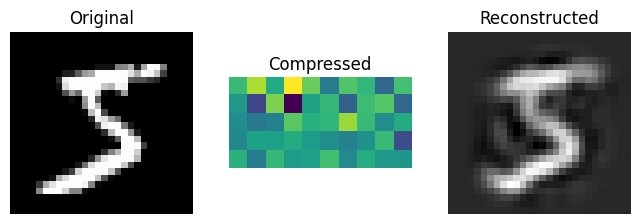

In [26]:
def show_compare(i):
  plt.figure(figsize=(8,3))

  plt.subplot(1, 3, 1)
  plt.title('Original')
  plt.imshow(x_norm[i]  ,   cmap='gray')
  plt.axis('off')



  plt.subplot(1, 3, 2)
  plt.title('Compressed')
  plt.imshow(x_pca[i].reshape(5,10),  cmap='viridis' )
  plt.axis('off')


  plt.subplot(1, 3, 3)
  plt.title('Reconstructed')
  plt.imshow(x_reconstructed[i],  cmap='gray')
  plt.axis('off')


  plt.show()



show_compare(0)

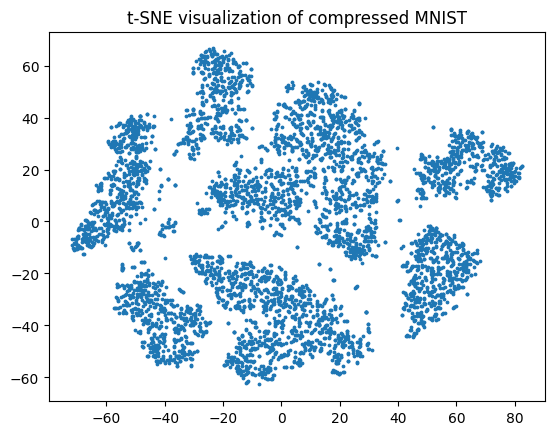

In [27]:
tsne = TSNE(n_components=2,  random_state=42,  perplexity=30)

x_tsne = tsne.fit_transform(x_pca)

plt.scatter(x_tsne[ : ,  0],   x_tsne[: , 1],  s=3)
plt.title('t-SNE visualization of compressed MNIST')
plt.show()


In [28]:
frames = []

for i in range(50):
  original = (x_norm[i]  * 255).astype(np.uint8)
  reconstructed = (x_reconstructed[i] * 255).astype(np.uint8)

  combined = np.hstack([original,  reconstructed])
  frames.append(combined)




imageio.mimsave('pca_compression.gif', frames, fps=2)




In [29]:
from IPython.display import Image
Image('pca_compression.gif')




In [30]:



from IPython.display import Image
Image(url="https://raw.githubusercontent.com/ruforavishnu/Project_Machine_Learning/master/pca_compression.gif")

